# Opportunity analysis of sports using log optimal betting strategy

## Load Libraries

In [1]:
import numpy as np #for numerical array data
import pandas as pd #for tabular data
import matplotlib.pyplot as plt #for plotting purposes
import cvxpy as cp
%matplotlib inline
import math
import importlib as imp
import bettingLib as bl
import riskMeasuresAndTools as rm
import time

## Figure out the minimum win prob per bet it would take to realize an expected return of .5% as a function of the number of bets you can make in a given week

In [2]:
start = time.time()
imp.reload(bl)
nVals = 50
ns = [n for n in range(1,nVals+1)]
vig = .02
probs = np.zeros(len(ns))
amountBet = np.zeros(len(ns))
cutoff = .005
for i in range(len(ns)):
    probs[i], amountBet[i] = bl.calc_breakeven_prob(vig, ns[i], cutoff=cutoff)
    if (i%10 == 0):
        print ('i = ' + str(i) + ' Time elapsed = ' + str((time.time() - start)/60.) + ' minutes')

i = 0 Time elapsed = 0.0015736460685729981 minutes
i = 10 Time elapsed = 0.07411011060078938 minutes
i = 20 Time elapsed = 0.24803921381632488 minutes
i = 30 Time elapsed = 0.5915311972300211 minutes
i = 40 Time elapsed = 1.0244707783063254 minutes


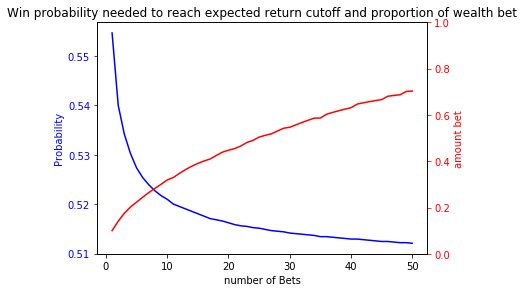

In [3]:
fig, ax1 = plt.subplots()
ax1.plot(ns, probs, 'b')
ax1.set_xlabel('number of Bets')
ax1.set_ylabel('Probability', color='b')
ax1.tick_params('y', colors='b')


ax2 = ax1.twinx()
ax2.plot(ns, amountBet, 'r')
ax2.set_ylabel('amount bet', color='r')
ax2.set_ylim(0, 1)
ax2.tick_params('y', colors='r')

fig.tight_layout()
plt.title('Win probability needed to reach expected return cutoff and proportion of wealth bet')
plt.show()

## Run Monte Carlo Simulations to figure out what the final wealth distribution is given the following quantities
* probWinningAGivenBet: probability you win a bet
* numBetsPerWeek: number of bets you can make per week
* The simulation assumes that you will bet the log optimal amount each week independent of your wealth at that point

In [4]:
probWinningAGivenBet = .55
numBetsPerWeek = 8
listOfTimeStepsToRecord = [x for x in range(0,16)]

In [5]:
imp.reload(bl)
dfProb = bl.make_df_prob(probWinningAGivenBet)
dfDistributions = bl.simulate_wealth_paths(dfProb, numBetsPerWeek, listOfTimeStepsToRecord, vig=.02, numSim=100000)

Here are the simulation conditions
During each time period, the player places 8 bets
Each bet has a win probability of 55.00000000000001%
Each bet made will be for 8.537160134097746% of the players wealth
Each winning bet will return 98.0% of the amount bet 
It runs 100000 independent monte-carlo simulations
It records the wealth distribution after the following time steps [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


In [6]:
dfDistributions.head(10)

,Time 0,Time 1,Time 2,Time 3,Time 4,Time 5,Time 6,Time 7,Time 8,Time 9,Time 10,Time 11,Time 12,Time 13,Time 14,Time 15
0,1.0,0.486063,0.482743,0.479446,0.395128,0.392430,0.389749,0.452969,0.373307,0.433860,0.724249,0.474454,0.310814,0.361230,0.480885,0.477601
1,1.0,0.824135,0.957814,0.951272,1.105575,1.284906,1.493325,1.735551,1.430328,0.937006,1.247381,1.238862,1.439813,1.673359,1.379073,1.136542
2,1.0,0.824135,0.818506,1.227986,0.596879,0.391014,0.388344,0.385692,0.448253,0.369421,0.366898,0.302373,0.402532,0.331740,0.273399,0.271531
3,1.0,1.500278,1.236431,1.227986,1.634746,1.899912,2.529242,2.511968,2.494812,2.899486,3.859917,4.486019,4.455380,5.178070,6.017984,6.994138
4,1.0,1.162206,1.350723,1.341498,1.785858,2.075535,3.113879,4.145325,3.416306,2.238017,1.844427,1.831830,2.128964,2.474295,2.875641,3.828174
5,1.0,1.500278,1.743632,2.321195,2.697707,3.135292,3.113879,3.092612,4.117014,3.392973,3.943334,1.916709,2.227610,1.835850,1.512988,1.502654
6,1.0,0.655099,0.761360,1.013554,1.177958,1.568148,1.557438,0.757013,0.751842,0.746708,0.615388,0.611185,0.813634,1.083144,0.892657,0.735669
7,1.0,1.162206,1.350723,1.341498,1.559097,2.075535,1.710520,1.698838,1.687235,1.390509,1.616057,1.058677,0.693538,0.688801,0.567665,0.467832
8,1.0,0.824135,0.679198,0.674559,0.669952,1.005114,1.338050,1.555089,1.544468,1.794991,1.175896,1.366633,1.588310,1.040500,1.209275,1.609837
9,1.0,0.993170,1.322150,1.313120,0.860223,1.290574,1.281759,1.489668,1.983109,2.304781,1.899450,0.923252,1.073009,1.065681,1.418679,1.888605


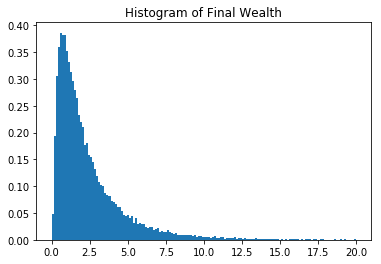

In [7]:
plt.hist(dfDistributions['Time 15'], bins = 150, range=(0,20),density=True)
plt.title('Histogram of Final Wealth')
plt.show()

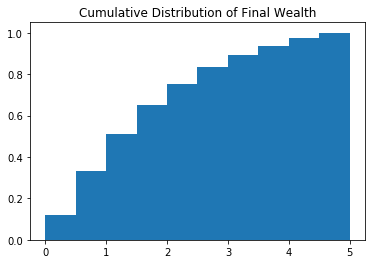

In [8]:
plt.hist(dfDistributions['Time 15'], range=(0,5), density=True, cumulative=True)
plt.title('Cumulative Distribution of Final Wealth')
plt.show()

In [9]:
print('Probability you make money = ')
print(100*dfDistributions[dfDistributions['Time 15'] >= 1].shape[0]/dfDistributions['Time 15'].shape[0])

Probability you make money = 
70.299


In [10]:
print('Average final wealth as a proportion of initial wealth = ')
print(dfDistributions['Time 15'].mean())

Average final wealth as a proportion of initial wealth = 
2.434184917248178


In [19]:
imp.reload(rm)
rm.full_report(dfDistributions[['Time 5', 'Time 10', 'Time 15']], goal=1.2, alpha=.05)

,Time 5,Time 10,Time 15
Average Wealth,1.344063,1.812831,2.434185
Vol of Wealth,0.706219,1.440445,2.534314
Prob of Making Money,0.632170,0.675120,0.702990
Prob of Meeting Goal,0.508000,0.588330,0.635000
Average Wealth Conditional On Losing Money,0.702041,0.632187,0.595177
